# Quarterback Salary Analysis

### Dataset

#### I chose to export data from overthecap.com and sportrac.com to get specific information about quarterback salaries and team wins for analysis. I selected football as my focus because I love sports. Football discussions often raise intriguing questions about the impact of player salaries on team success and the data I compiled provides a great opportunity to explore those questions. By analyzing this dataset, I aimed to uncover insights that align with real-world sports debates.

In [18]:
import pandas as pd

salary_cap_csv = "https://raw.githubusercontent.com/zmosDS/qb_salary_analysis/refs/heads/main/NFL_Salary_Cap.csv"
qb_salaries_csv = "https://raw.githubusercontent.com/zmosDS/qb_salary_analysis/refs/heads/main/qb%20salaries.csv"
team_wins_csv = "https://raw.githubusercontent.com/zmosDS/qb_salary_analysis/refs/heads/main/Team%20WL%2010%20years.csv"

salary_cap = pd.read_csv(salary_cap_csv) 
qb_salaries_raw = pd.read_csv(qb_salaries_csv)
team_wins = pd.read_csv(team_wins_csv)

print(salary_cap.head(),'\n')
print(qb_salaries_raw.head(),'\n')
print(team_wins.head())

   Year  Salary Cap ($)  Cap Increase ($)  Cap Increase (%)
0  2023       224800000          16600000              7.97
1  2022       208200000          25700000             14.08
2  2021       182500000         -15700000             -7.92
3  2020       198200000          10000000              5.31
4  2019       188200000          11000000              6.21 

           Player            Team  Year \nSigned  Years       Value  \
0      Adam Weber  Denver Broncos           2011      3  $1,405,000   
1      Adam Weber  Denver Broncos           2011      1     $96,900   
2      Adam Weber  Denver Broncos           2012      1    $390,000   
3  Anthony Gordon  Denver Broncos           2021      1    $165,600   
4    Austin Davis  Denver Broncos           2016      1  $1,250,000   

          APY Guaranteed APY as % Of \nCap At Signing Inflated \nValue  \
0    $468,333    $10,000                         0.4%       $2,980,993   
1     $96,900         $0                         0.1%         $

### EDA

In [19]:
# Extract salaries for qb per year
qb_salaries = []

for index, row in qb_salaries_raw.iterrows():
    player = row['Player']
    team = row['Team']
    start_year = int(row['Year \nSigned'])
    years = int(row['Years'])
    apy = float(row['APY'].replace('$', '').replace(',', ''))
    
    for year in range(start_year, start_year + years):
        qb_salaries.append({
            'Player': player,
            'Team': team,
            'Year': year,
            'Annual Salary': apy
        })

qb_salaries = pd.DataFrame(qb_salaries)
qb_salaries.head()

,Player,Team,Year,Annual Salary
0,Adam Weber,Denver Broncos,2011,468333.0
1,Adam Weber,Denver Broncos,2012,468333.0
2,Adam Weber,Denver Broncos,2013,468333.0
3,Adam Weber,Denver Broncos,2011,96900.0
4,Adam Weber,Denver Broncos,2012,390000.0


In [20]:
# Filter for the highest-paid QB on each team per year to keep analysis simple
qb_salaries = qb_salaries.loc[qb_salaries.groupby(['Team', 'Year'])['Annual Salary'].idxmax()]

# Filter for salaries between 2014 & 2023 (Last 10 years)
qb_salaries = qb_salaries[(qb_salaries['Year'] >= 2014) & (qb_salaries['Year'] <= 2023)]

qb_salaries = qb_salaries.reset_index(drop=True)
qb_salaries.head()

,Player,Team,Year,Annual Salary
0,Carson Palmer,Arizona Cardinals,2014,16500000.0
1,Carson Palmer,Arizona Cardinals,2015,16500000.0
2,Carson Palmer,Arizona Cardinals,2016,21000000.0
3,Drew Stanton,Arizona Cardinals,2017,3250000.0
4,Sam Bradford,Arizona Cardinals,2018,20000000.0


In [21]:
qb_salaries = pd.merge(qb_salaries, salary_cap, on='Year', how='inner')

# Calculate salary percentage of cap in new column
qb_salaries['Salary as % of Cap'] = (qb_salaries['Annual Salary'] / qb_salaries['Salary Cap ($)']) * 100

nfl_qb = pd.merge(qb_salaries, team_wins, on=['Team', 'Year'], how='inner')
nfl_qb.head()

,Player,Team,Year,Annual Salary,Salary Cap ($),Cap Increase ($),Cap Increase (%),Salary as % of Cap,W,L,T,W-L%
0,Carson Palmer,Arizona Cardinals,2016,21000000.0,155270000,11990000,8.37,13.524828,7,8,1,0.469
1,Drew Stanton,Arizona Cardinals,2017,3250000.0,167000000,11730000,7.55,1.946108,8,8,0,0.500
2,Sam Bradford,Arizona Cardinals,2018,20000000.0,177200000,10200000,6.11,11.286682,3,13,0,0.188
3,Sam Bradford,Arizona Cardinals,2019,20000000.0,188200000,11000000,6.21,10.626993,5,10,1,0.344
4,Kyler Murray,Arizona Cardinals,2020,8789661.0,198200000,10000000,5.31,4.434743,8,8,0,0.500


In [22]:
nfl_qb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Player              180 non-null    object 
 1   Team                180 non-null    object 
 2   Year                180 non-null    int64  
 3   Annual Salary       180 non-null    float64
 4   Salary Cap ($)      180 non-null    int64  
 5   Cap Increase ($)    180 non-null    int64  
 6   Cap Increase (%)    180 non-null    float64
 7   Salary as % of Cap  180 non-null    float64
 8   W                   180 non-null    int64  
 9   L                   180 non-null    int64  
 10  T                   180 non-null    int64  
 11  W-L%                180 non-null    float64
dtypes: float64(4), int64(6), object(2)
memory usage: 17.0+ KB


In [23]:
round(nfl_qb.describe(),2)

,Year,Annual Salary,Salary Cap ($),Cap Increase ($),Cap Increase (%),Salary as % of Cap,W,L,T,W-L%
count,180.00,180.00,1.800000e+02,180.00,180.00,180.00,180.00,180.00,180.00,180.00
mean,2018.66,15705941.22,1.794729e+08,10414555.56,6.40,8.67,6.29,9.94,0.08,0.39
std,2.90,12994614.97,2.778163e+07,9671562.49,5.16,6.45,2.25,2.21,0.27,0.14
min,2014.00,495000.00,1.330000e+08,-15700000.00,-7.92,0.30,0.00,4.00,0.00,0.00
25%,2016.00,5163701.00,1.552700e+08,10000000.00,6.11,3.31,5.00,8.00,0.00,0.31
50%,2019.00,14750000.00,1.825000e+08,11000000.00,7.61,8.77,7.00,10.00,0.00,0.41
75%,2021.00,21000000.00,1.982000e+08,11990000.00,7.97,13.20,8.00,11.00,0.00,0.50
max,2023.00,55000000.00,2.248000e+08,25700000.00,14.08,24.47,13.00,16.00,1.00,0.76


The dataset contains 188 rows, with no missing values or duplicates. The is clean and I have prepared it for analysis by breaking multi-year contracts into annual salaries, focusing on the highest-paid QB per team per year, and merging datasets to calculate salary as a percentage of the cap. QB salaries ranged widely, from `$495,000` to `$55,000,000`, with an average of `$15,705,941` in the last 10 years. I only used data from the 2014-2023 seasons. The average QB salary accounted for 8.67% of the salary cap, with some taking up to 24.47%. Team win percentages showed significant variation, from 0% to 76%, with an average of 39%. 

## Question 1

### Does the percentage of the salary cap allocated to a quarterback correlate with a team's win percentage?

In [25]:
# Correlations to W-L%
salarycap_win_correlation = nfl_qb['Salary as % of Cap'].corr(nfl_qb['W-L%'])
salary_win_correlation = nfl_qb['Annual Salary'].corr(nfl_qb['W-L%'])

print(f'Correlation between Salary as % of Cap and W-L%: {round(salarycap_win_correlation, 3)}')
print(f'Correlation between Annual Salary and W-L%: {round(salary_win_correlation, 3)}')

Correlation between Salary as % of Cap and W-L%: 0.122
Correlation between Annual Salary and W-L%: 0.124


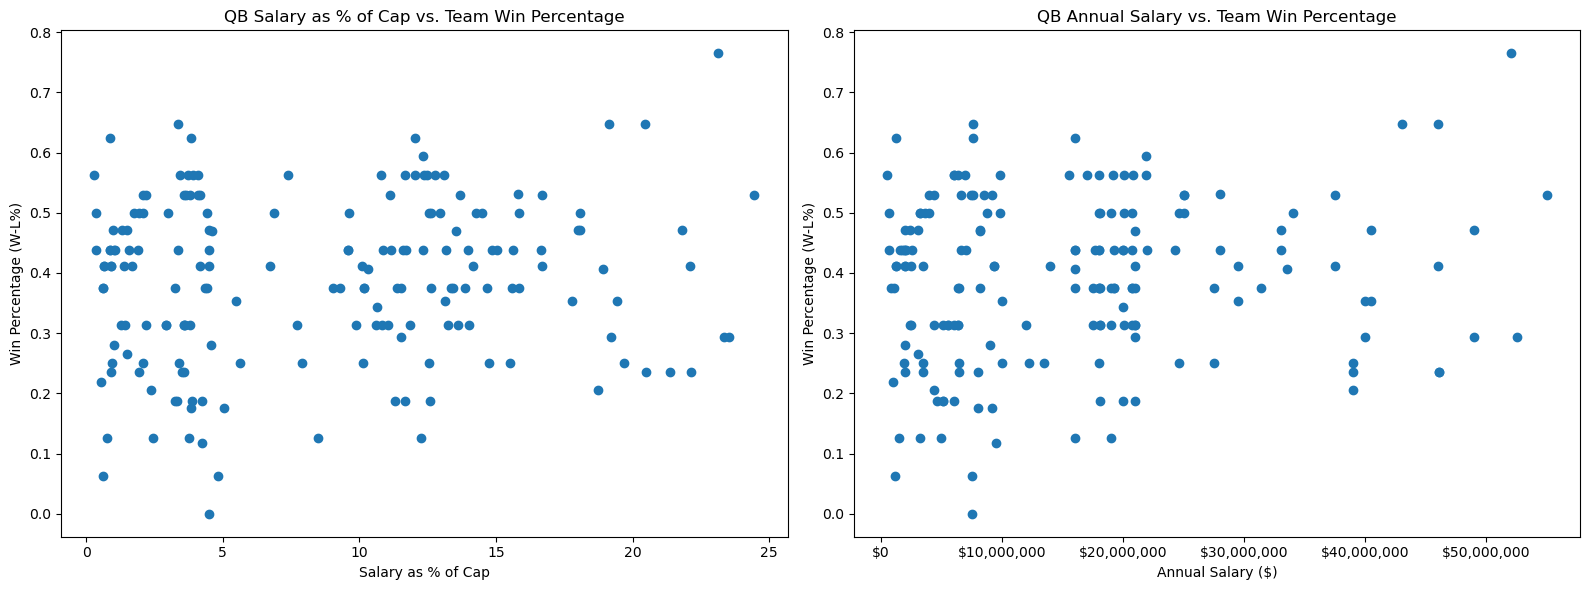

In [34]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Scatterplot for Salary as % of Cap vs W-L%
axes[0].scatter(nfl_qb['Salary as % of Cap'], nfl_qb['W-L%'], label='Salary as % of Cap')
axes[0].set_title('QB Salary as % of Cap vs. Team Win Percentage')
axes[0].set_xlabel('Salary as % of Cap')
axes[0].set_ylabel('Win Percentage (W-L%)')

# Scatterplot for Annual Salary vs W-L%
axes[1].scatter(nfl_qb['Annual Salary'], nfl_qb['W-L%'], label='Annual Salary')
axes[1].set_title('QB Annual Salary vs. Team Win Percentage')
axes[1].set_xlabel('Annual Salary ($)')
axes[1].set_ylabel('Win Percentage (W-L%)')
axes[1].xaxis.set_major_formatter(mticker.StrMethodFormatter('${x:,.0f}')) # removes scientific notation

plt.tight_layout()
plt.show()

#### Paying quarterbacks more money—either as a percentage of the cap or in total salary—doesn’t seem to make a big difference in how successful a team is. The correlation between Salary as a Percentage of the Cap and Win Percentage is 0.122, and the correlation between Annual Salary and Win Percentage is 0.124. Both numbers are very small, suggesting no meaningful relationship. 

#### The scatterplots confirm this, as the data points are spread out with no clear trend. Teams with highly-paid quarterbacks don’t consistently win more games than teams with lower-paid quarterbacks. This suggests that other factors, like how the rest of the salary cap is spent or overall team strategy, could have a bigger impact on team success

#### I thought a scatterplot would be effective here to visually show the relationship between quarterback salaries and team win percentages.

## Question 2

### What distinct patterns or groups emerge when clustering teams by QB salary as a percentage of the cap and win percentage?"

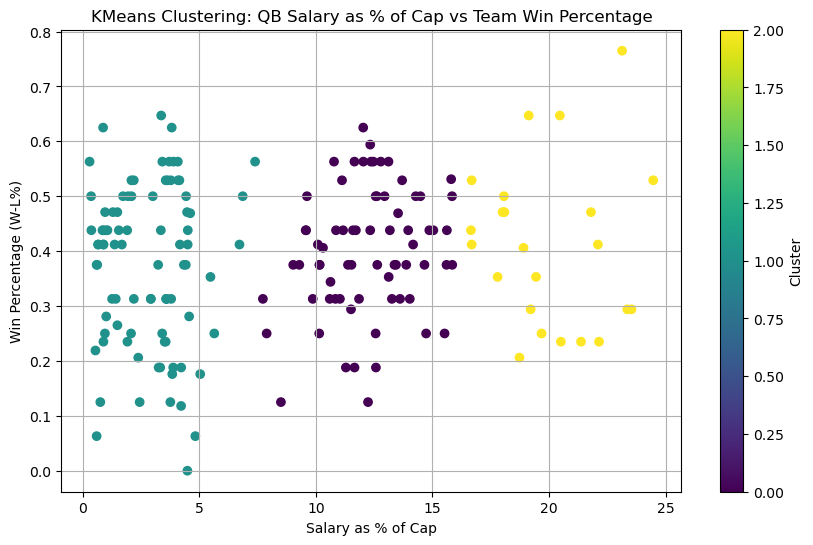

In [46]:
from sklearn.cluster import KMeans

X = nfl_qb[['Salary as % of Cap', 'W-L%']].dropna()

kmeans = KMeans(n_clusters=3, random_state=42)
nfl_qb['Cluster'] = kmeans.fit_predict(X)
nfl_qb['Cluster'] = kmeans.labels_

plt.figure(figsize=(10, 6))
plt.scatter(nfl_qb['Salary as % of Cap'], nfl_qb['W-L%'], c=nfl_qb['Cluster'], cmap='viridis')
plt.title('KMeans Clustering: QB Salary as % of Cap vs Team Win Percentage')
plt.xlabel('Salary as % of Cap')
plt.ylabel('Win Percentage (W-L%)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

#### KMeans clustering highlights three distinct groups of teams based on QB salary as a percentage of the cap and their win percentages. While higher spending on QBs can lead to higher success, it is not a guarantee. Lower-salary teams show greater variability in performance which indicates that spending less on a QB is riskier but can pay off under the right conditions.

#### The scatterplot shows the clusters and their distributions well. 3 clusters did the best job of grouping clearly. 

## Question 3

### Are higher-paid quarterbacks more consistent in team win percentage compared to lower-paid quarterbacks?

In [47]:
nfl_qb['Salary Tier'] = pd.qcut(nfl_qb['Annual Salary'], q=4, labels=['Low', 'Mid-Low', 'Mid-High', 'High'])

# Calculate standard deviation
consistency = nfl_qb.groupby('Salary Tier')['W-L%'].std().reset_index()
consistency.columns = ['Salary Tier', 'Win Percentage Variability (Std Dev)']
consistency

/var/folders/m3/brcgwnys2cz7hsgh16p2fdqc0000gn/T/ipykernel_31061/2674209656.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  consistency = nfl_qb.groupby('Salary Tier')['W-L%'].std().reset_index()


,Salary Tier,Win Percentage Variability (Std Dev)
0,Low,0.135681
1,Mid-Low,0.155901
2,Mid-High,0.115424
3,High,0.131903


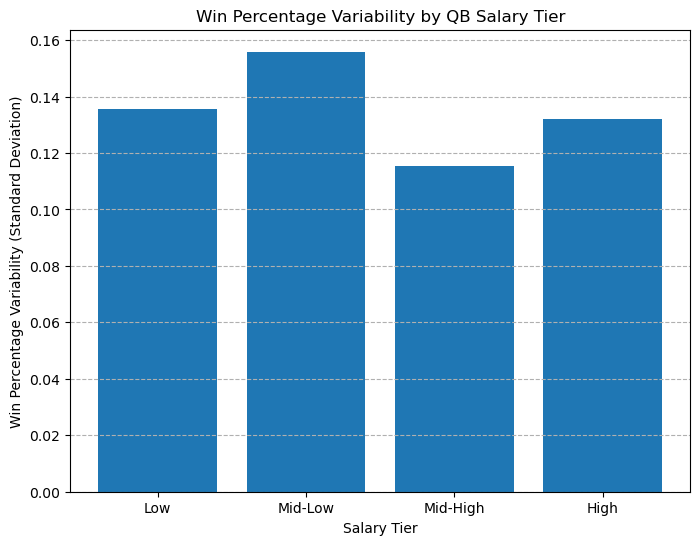

In [48]:
plt.figure(figsize=(8, 6))
plt.bar(consistency['Salary Tier'], consistency['Win Percentage Variability (Std Dev)'])
plt.title('Win Percentage Variability by QB Salary Tier')
plt.xlabel('Salary Tier')
plt.ylabel('Win Percentage Variability (Standard Deviation)')
plt.grid(axis='y', linestyle='--')
plt.show()

#### Higher-paid quarterbacks (high tier) show moderate consistency, but they are not the most consistent overall. Teams in the mid-high tier (just below the highest salary bracket) demonstrate the most consistent win percentages, potentially striking a balance between investing in a QB and maintaining cap flexibility.

#### Calculating standard deviation is an effective way to show the variability in win percentages across salary tiers/groups. 

### Findings

Correlation Analysis (Question 1): The relationship between quarterback salaries and team success, measured as win percentage, appears to be weak. The correlation coefficients 0.122 for "Salary as a Percentage of the Cap" and 0.124 for "Annual Salary" indicate no significant correlation. This suggests that paying quarterbacks higher salaries does not guarantee better team performance. The scatterplots reinforced this finding by showing no clear trend or pattern between higher QB salaries and higher win percentages.

Cluster Analysis (Question 2): KMeans clustering revealed three distinct groups of teams based on quarterback salaries as a percentage of the cap and win percentages. 
Low QB Salary (<7% of cap): High variability in team success, showing both significant underperformance and occasional overperformance.
Moderate QB Salary (~7-16% of cap): More stable team performance, with win percentages generally around or above average.
High QB Salary (>16% of cap): Teams with highly paid quarterbacks tend to perform better but with diminishing returns as spending increases.
This finding suggests that moderate investment in quarterbacks may strike a balance between resource allocation and team success, while excessive spending introduces risk without guaranteeing results.

Consistency Analysis (Question 3): Examining win percentage variability across salary tiers revealed that higher-paid quarterbacks exhibit slightly less variability in team success compared to lower-paid QBs. This implies that investing in a higher-salaried QB may provide some level of stability but does not eliminate the possibility of underperformance.